In [6]:
# Import the API key.
from config import weather_api_key

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests



In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


607

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("----------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
----------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | yulara
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | yefira
City not found. Skipping...
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | rincon
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | batagay
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | karratha
Processing Record 19 of Set 1 | korla
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | saskylakh
Processing Record 22

Processing Record 33 of Set 4 | asmara
Processing Record 34 of Set 4 | dumesti
Processing Record 35 of Set 4 | santa rita
Processing Record 36 of Set 4 | kimbe
Processing Record 37 of Set 4 | maldonado
Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | lompoc
Processing Record 40 of Set 4 | luis correia
Processing Record 41 of Set 4 | bathsheba
Processing Record 42 of Set 4 | castro
Processing Record 43 of Set 4 | lagoa
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | ihosy
Processing Record 46 of Set 4 | kloulklubed
Processing Record 47 of Set 4 | bayanday
Processing Record 48 of Set 4 | jiuquan
Processing Record 49 of Set 4 | alice springs
Processing Record 50 of Set 4 | yellowknife
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | richards bay
Processing Record 3 of Set 5 | kasongo-lunda
Processing Record 4 of Set 5 | beira
Processing Record 5 of Set 5 | grants
Processing Record 6 of Set 5 | mezhova
Processing R

Processing Record 26 of Set 8 | ancud
Processing Record 27 of Set 8 | tacuarembo
Processing Record 28 of Set 8 | suhindol
Processing Record 29 of Set 8 | mayor pablo lagerenza
Processing Record 30 of Set 8 | parati
Processing Record 31 of Set 8 | kenmare
Processing Record 32 of Set 8 | rawlins
Processing Record 33 of Set 8 | omagh
Processing Record 34 of Set 8 | binzhou
Processing Record 35 of Set 8 | mareeba
Processing Record 36 of Set 8 | xinzhou
Processing Record 37 of Set 8 | san jose
Processing Record 38 of Set 8 | arkhangelskoye
Processing Record 39 of Set 8 | chagda
City not found. Skipping...
Processing Record 40 of Set 8 | mazamitla
Processing Record 41 of Set 8 | pangnirtung
Processing Record 42 of Set 8 | luang prabang
Processing Record 43 of Set 8 | tarrega
Processing Record 44 of Set 8 | scicli
Processing Record 45 of Set 8 | kaili
Processing Record 46 of Set 8 | lolua
City not found. Skipping...
Processing Record 47 of Set 8 | sarakhs
Processing Record 48 of Set 8 | yarin

Processing Record 13 of Set 12 | kerteh
City not found. Skipping...
Processing Record 14 of Set 12 | nan
Processing Record 15 of Set 12 | manyana
Processing Record 16 of Set 12 | balkanabat
Processing Record 17 of Set 12 | bayji
Processing Record 18 of Set 12 | port lincoln
Processing Record 19 of Set 12 | sinnamary
Processing Record 20 of Set 12 | bardiyah
Processing Record 21 of Set 12 | aksu
Processing Record 22 of Set 12 | inverell
Processing Record 23 of Set 12 | kholodnyy
Processing Record 24 of Set 12 | marinette
Processing Record 25 of Set 12 | fengkou
Processing Record 26 of Set 12 | barawe
City not found. Skipping...
Processing Record 27 of Set 12 | allende
Processing Record 28 of Set 12 | slave lake
Processing Record 29 of Set 12 | puerto escondido
Processing Record 30 of Set 12 | tripoli
Processing Record 31 of Set 12 | cherskiy
Processing Record 32 of Set 12 | avera
Processing Record 33 of Set 12 | burica
City not found. Skipping...
Processing Record 34 of Set 12 | fairban

In [12]:
len(city_data)

551

In [13]:
# Conver the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,60.01,97,100,3.04,AU,2021-04-28 22:26:09
1,Albany,42.6001,-73.9662,64.00,70,100,10.40,US,2021-04-28 22:26:09
2,Hilo,19.7297,-155.0900,84.20,48,90,9.22,US,2021-04-28 22:26:10
3,Leningradskiy,69.3833,178.4167,21.31,77,23,3.44,RU,2021-04-28 22:26:10
4,Yulara,-25.2406,130.9889,53.60,50,0,6.91,AU,2021-04-28 22:26:10
5,Arraial Do Cabo,-22.9661,-42.0278,75.20,73,20,3.44,BR,2021-04-28 22:26:10
6,Bambous Virieux,-20.3428,57.7575,75.99,94,75,11.50,MU,2021-04-28 22:22:45
7,Kapaa,22.0752,-159.3190,73.99,88,90,13.80,US,2021-04-28 22:26:11
8,Saint-Philippe,-21.3585,55.7679,75.20,83,0,4.61,RE,2021-04-28 22:22:16
9,Hermanus,-34.4187,19.2345,51.01,91,15,7.18,ZA,2021-04-28 22:26:11


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-04-28 22:26:09,-33.6500,115.3333,60.01,97,100,3.04
1,Albany,US,2021-04-28 22:26:09,42.6001,-73.9662,64.00,70,100,10.40
2,Hilo,US,2021-04-28 22:26:10,19.7297,-155.0900,84.20,48,90,9.22
3,Leningradskiy,RU,2021-04-28 22:26:10,69.3833,178.4167,21.31,77,23,3.44
4,Yulara,AU,2021-04-28 22:26:10,-25.2406,130.9889,53.60,50,0,6.91
5,Arraial Do Cabo,BR,2021-04-28 22:26:10,-22.9661,-42.0278,75.20,73,20,3.44
6,Bambous Virieux,MU,2021-04-28 22:22:45,-20.3428,57.7575,75.99,94,75,11.50
7,Kapaa,US,2021-04-28 22:26:11,22.0752,-159.3190,73.99,88,90,13.80
8,Saint-Philippe,RE,2021-04-28 22:22:16,-21.3585,55.7679,75.20,83,0,4.61
9,Hermanus,ZA,2021-04-28 22:26:11,-34.4187,19.2345,51.01,91,15,7.18


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

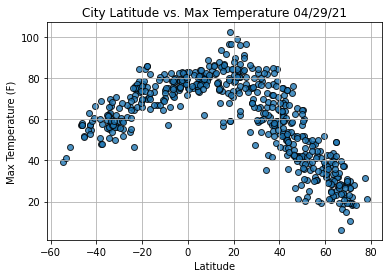

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

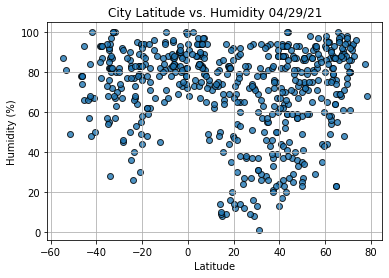

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

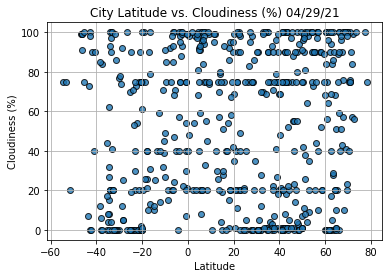

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

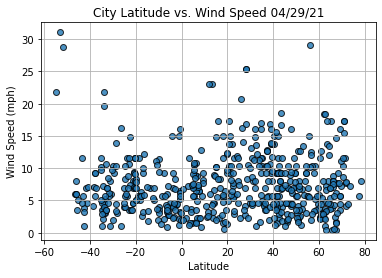

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                      Batagay
Country                        RU
Date          2021-04-28 22:26:12
Lat                       67.6333
Lng                      134.6333
Max Temp                    18.93
Humidity                       91
Cloudiness                     76
Wind Speed                   1.72
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
546     True
547     True
548    False
549    False
550    False
Name: Lat, Length: 551, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Albany,US,2021-04-28 22:26:09,42.6001,-73.9662,64.00,70,100,10.40
2,Hilo,US,2021-04-28 22:26:10,19.7297,-155.0900,84.20,48,90,9.22
3,Leningradskiy,RU,2021-04-28 22:26:10,69.3833,178.4167,21.31,77,23,3.44
7,Kapaa,US,2021-04-28 22:26:11,22.0752,-159.3190,73.99,88,90,13.80
10,Rincon,US,2021-04-28 22:26:11,32.2960,-81.2354,78.80,57,20,16.11


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

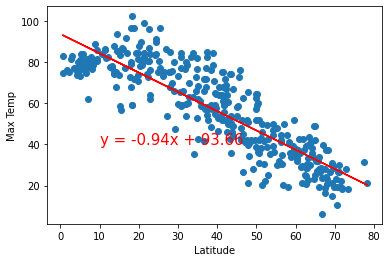

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

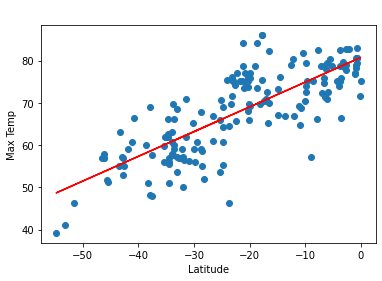

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

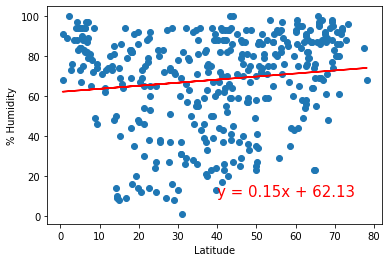

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-35-9c3e8b244753>, line 6)